# Visual style

The project uses unified visual style across all public outputs. That entails a colour map, plotting styles and map styles. All components are outlined and illustrated below in this Jupyter notebook. 

The style uses custom colours, seaborn predefined styles, custom contextily basemaps, and additonal features collected in `urbangrammar_graphics` Python package.

Requires contextily 1.1.0 or newer to support alpha channel in basemaps.

In [17]:
import urbangrammar_graphics as ugg

In [18]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from random import shuffle
import contextily

## Default settings

Default settings of the context and plotting style.

In [19]:
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})

# during plotting
#sns.despine(offset=10)

## Default colors

Default colors in _rgb_ scheme. We use 6 primary colours derived from the work of Jane Addams and Florence Kelley Hull House Maps and Papers  (1895). See more in the relevant blog post.

Colour map is colorblind safe.

In [20]:
colors = ugg.COLORS

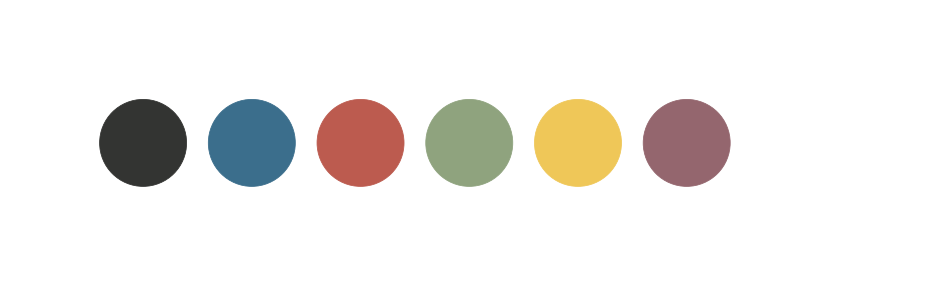

In [21]:
fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(colors):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))    
    ax.set_axis_off()
    ax.set_aspect(1)
    plt.xlim(-1.25,7.25)
    plt.ylim(-1.25,1.25)

### Sequential palettes

Sequeential palettes generated from default colors and their application.

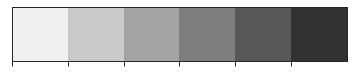

In [22]:
sns.palplot(sns.light_palette(colors[0]))

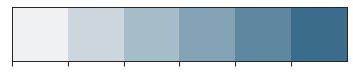

In [23]:
sns.palplot(sns.light_palette(colors[1]))

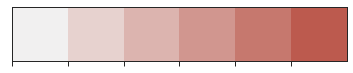

In [24]:
sns.palplot(sns.light_palette(colors[2]))

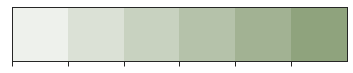

In [25]:
sns.palplot(sns.light_palette(colors[3]))

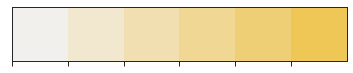

In [26]:
sns.palplot(sns.light_palette(colors[4]))

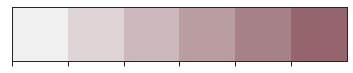

In [27]:
sns.palplot(sns.light_palette(colors[5]))

### Diverging

Diverging palette derived from blue and red primary colours.

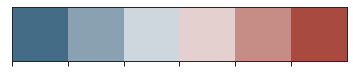

In [28]:
sns.palplot(ugg.DIVERGING)

### Desaturated

Desatureated version of the palette.

In [29]:
desaturated = sns.color_palette(colors, desat=0)

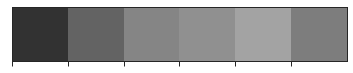

In [30]:
sns.palplot(desaturated)

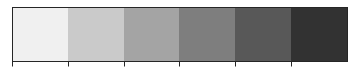

In [31]:
sns.palplot(sns.color_palette(sns.light_palette(colors[0]), desat=0))

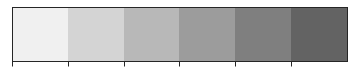

In [32]:
sns.palplot(sns.color_palette(sns.light_palette(colors[1]), desat=0))

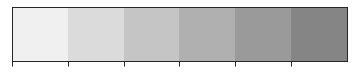

In [33]:
sns.palplot(sns.color_palette(sns.light_palette(colors[2]), desat=0))

### Converting to matplotlib

Sequential and diverging palettes created in seaborn can be easily converted to matplotlib with `as_cmap=True`:

In [34]:
cmap = sns.light_palette(colors[1], as_cmap=True, n_colors=10)

Default colors can be accessed as a `ListedColormap` directly.

In [35]:
cmap = ugg.CMAP

# Qualitative map

Let's now use colors to map spatial signatures.

In [11]:
df = gpd.read_parquet("data/bcn_ss.pq")

With 16 types of signatures, we need to expand the color map by addition of other shades derived from primary colours. To break grouping, we can either manually assign colours to types or shuffle the order.

In [39]:
cmap = ugg.get_colormap(df.cluster.nunique())

The map itself uses custom Mapbox tiles to provide context. To avoid the loss of quality (esp. in text) it is better to plot in Web Mercator (EPSG:3857). To add a scalebar, we use `matplotlib-scalebar`. To add a north arrow, we use a custom function.

In [13]:
df = df.to_crs(3857)

In [14]:
token = "<add mapbox token>"

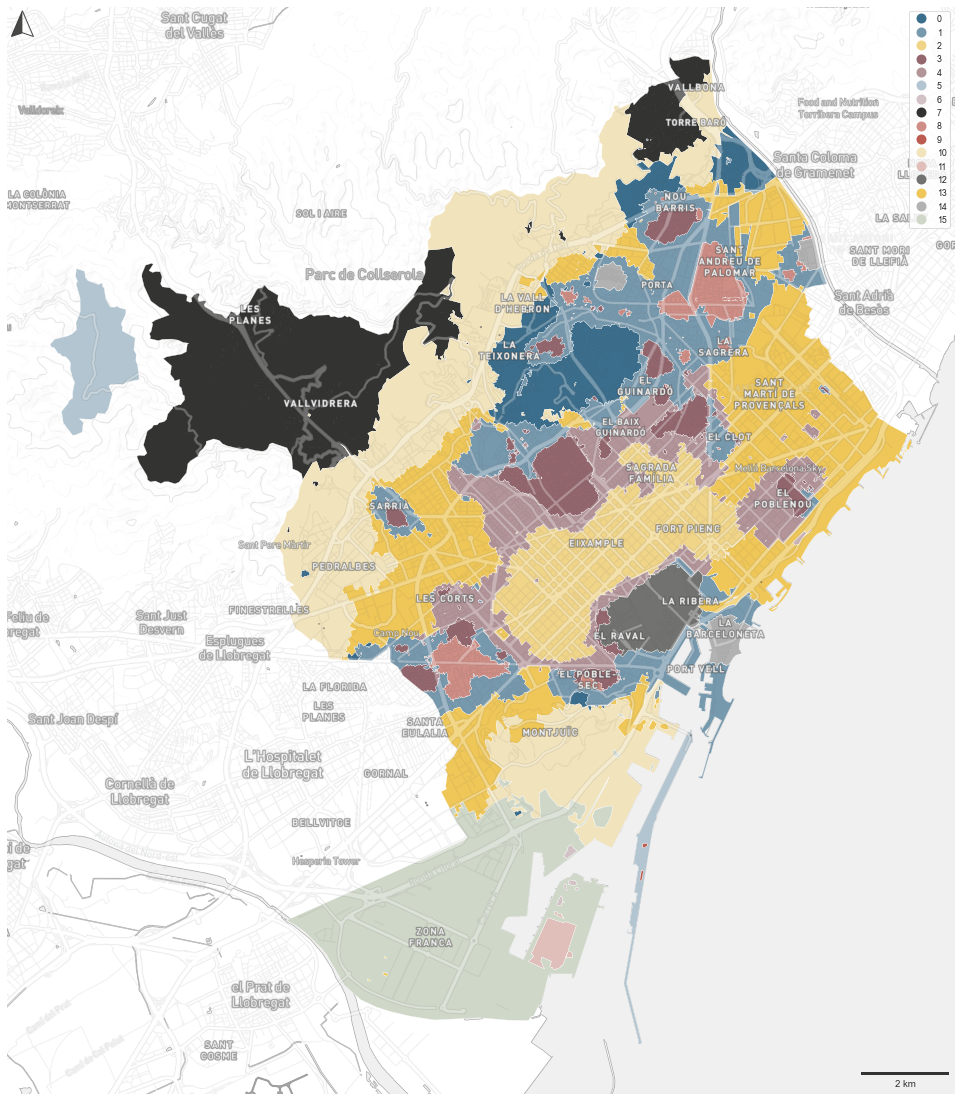

In [40]:
ax = df.plot('cluster', categorical=True, legend=True, figsize=(20, 20), cmap=cmap, zorder=1, linewidth=.3, edgecolor='w', alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('roads', token), zorder=2, alpha=.3)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('labels', token), zorder=3, alpha=1)
contextily.add_basemap(ax, crs=df.crs, source=ugg.get_tiles('background', token), zorder=-1, alpha=1)
ax.set_axis_off()

scalebar = ScaleBar(dx=1,
                    color=colors[0],
                    location='lower right',
                    height_fraction=0.002,
                    pad=.5,
                    frameon=False,
                    )
ax.add_artist(scalebar)

ugg.north_arrow(plt.gcf(), ax, 0, size=.026, linewidth=1, color=colors[0], loc="upper left", pad=.002, alpha=.9)